<a href="https://colab.research.google.com/github/chandusayhi/Cardiovascular_Risk_Prediction/blob/main/Chandrakant_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Classification model to predict 10-year risk of future coronary heart disease (CHD)</b>

Heart disease refers to various types of conditions that can affect heart function. These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural defects that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Most heart diseases are highly preventable and simple lifestyle modifications(such as reducing tobacco use, eating healthily, obesity and exercising) coupled with early treatment greately improve their prognoses. It is, however, difficult to identify high risk patients because of the mulfactorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol et cetera. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

Machine learning (ML), due to its superiority in pattern detection and classification, proves to be effective in assisting decision making and risk assesment from the large quantity of data produced by the healthcare industry on heart disease.

In this notebook, I will be exploring different Machine Learning approaches for predicting wheather a patient has 10-year risk of developing coronary heart disease (CHD) using the Framingham dataset.




<h1><b>Problem Statement</b>

Predict whether a patient has risk of developing coronary heart disease. 

<h1><b>How to solve it?</b>

Using classification machine learning models to predict. In this study in particular, I will go over some of the classification algorithms in detail to consolidate the knowledge on these tools.  

<h1><b>Dataset</b>

The dataset is made available on almabetter website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

<h1><b>About the data</b>

The dataset is from a cardiovascular study on residents of the town of Framingham, Massachusetts. It includes over 4,240 records and 15 attributes.

The information provided by the dataset are:

<h3><b>Demographics:</b>

* Sex: male or female(Nominal)
* Age: the age of the patient at the time of the study (Coninuous)
* Education level

<h3><b>Behavioral:</b>

* Current Smoker: whether or not the patient is a current smoker (Nominal)(0 - No, 1 - Yes)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (Continuous)

<h3><b>Medical History:</b>

* BP Meds: whether or not the patient was on blood pressure medication (binary - 0 - No, 1 - Yes)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (binary - 0 - No, 1 - Yes)
* Diabetes: whether or not the patient had diabetes (Nominal) (binary - 0 - No, 1 - Yes)

<h3><b>Target variable:</b>

* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

<h3><b>We are going to perform the following steps: </b>

1. Read the file and display columns.
2. Handle missing values, Outliers and Duplicate Data
3. Calculate basic statistics of the data (count, mean, std, etc) and exploratory analysts and describe your observations.
4. Select columns that will be probably important to predict heart disease.
5. If you remove columns explain why you removed those.
6. Create training and testing sets (use 60% of the data for the training and remaining data for testing).
7. Build a machine learning model to predict TenYearCHD
Evaluate the model (f1 score, Accuracy, Precision ,Recall and Confusion Matrix)
8. Conclude your findings (Model which is giving best f1 score)


In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# Data Resampling
from sklearn.utils import resample

# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Splitting
from sklearn.model_selection import train_test_split

# Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
#load the data
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Classification/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
#Finding the dimensions of the dataset 
data.shape

(3390, 17)

In [4]:
#Finding the information of variables of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

This shows an overview of the Columns, non-null count and the data types of the dataset

<h1><b>Missing variables</b>

Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [5]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [6]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


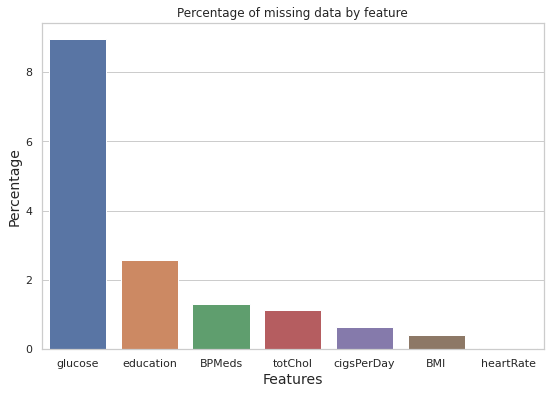

In [7]:
#Percentage of Missing Values 
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

At 8.96%, the blood glucose entry has the highest percentage of missing data. The other features have very few missing entries.


Missing data can be treated by essentially two methods:
* Imputation 
* Deleting 

Some reasons why data goes missing:
* **MAR (missing at random)**: propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data
* **MCAR (Missing Completely at Random)**: when the probability that the data are missing is not related to either the specific value which is supposed to be obtained or the set of observed responses.
* **MNAR (Missing not at random)**: the missing value depends on the hypothetical value or missing value is dependent on other variable's value. According to a sutdy on the [Korean Journal of Anesthesiology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/) this type of missing data is more problematic and the only way to obtain an unbiased estimate of the parameters in such a case is to model the missing data. The model may then be incorporated into a more complex one for estimating the missing values.

Out of 3390 rows 510, (15.04%) of the rows have missing values. Looking at each variable, the one with the highest percentage of missing values is glucose (9%). As all the variables with missing values have less than 25% of missing information, it will not be considered deleting the whole column but only the rows that contain missing information. 
I understand that most of the variables with missing numbers are related to medical records and it is better not to impute this type of information. 

The best method for handling missing data, in such a study, [would be to plan the study more carefully](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/), especially the data collection step.  

In [97]:
#Finding the mode of glucose
print((data["glucose"].mode())[0])

75.0


In [9]:
#Filling Glucose Variable with mode
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

Filling the missing spaces of `glucose`column with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [10]:
# drop missing entries
data.dropna(axis=0, inplace=True)

In [11]:
#Finding the dimensions of the dataset 
data.shape

(3189, 17)

In [12]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage


In [13]:
#Duplicated data
data.duplicated().sum()

0

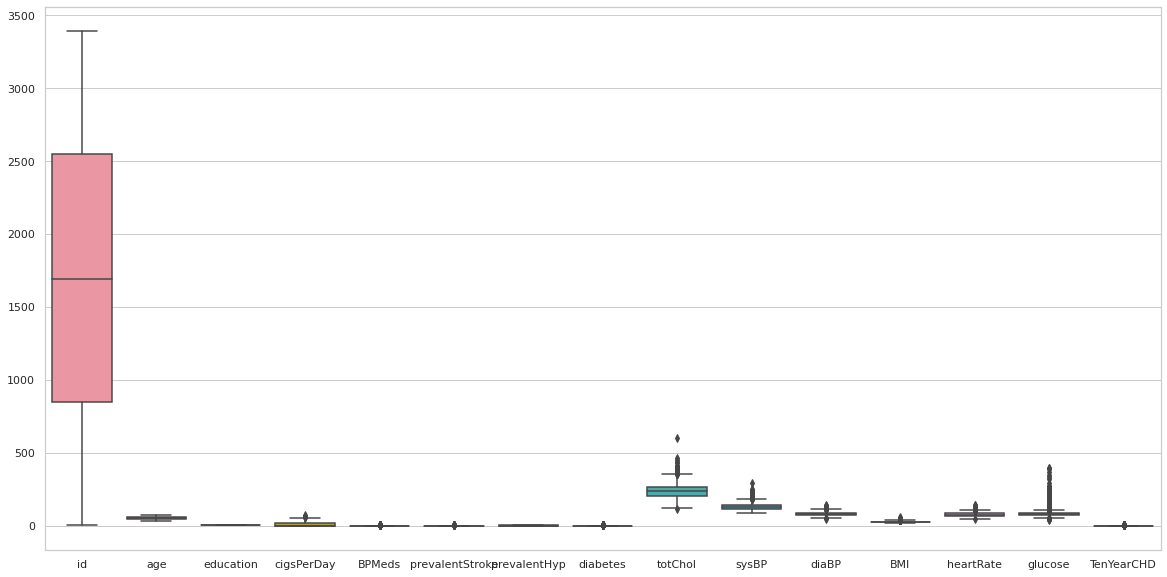

In [14]:
#Boxplot for finding the outliers 
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [15]:
#Finding the maximum value of totChol variable
data['totChol'].max()

600.0

The Outlier present in totChol is 600.

In [16]:
#Finding the maximum value of sysBP variable
data['sysBP'].max()

295.0

In [17]:
#Removing the outliers values 
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3187, 17)

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

In [18]:
# Looking up for the detailed description of our dataset.
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000
mean,1696.561657,49.418575,1.973015,9.103859,0.029495,0.005962,0.312833,0.025102,236.849702,132.376843,82.821305,25.769693,76.028553,81.349859,0.148415
std,980.937891,8.554900,1.018609,11.866153,0.169215,0.076994,0.463720,0.156459,44.084212,21.990752,11.960124,4.127440,12.057203,23.156614,0.355567
min,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.500000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.935000,68.000000,72.000000,0.000000
50%,1691.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.360000,75.000000,77.000000,0.000000
75%,2547.500000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,27.985000,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


An overall Statistical Information is shown

1. It is clearly evident that none of the data is missing in columns.
2. It also shows the mean, standard deviation and other statistical metrices of the dataset
3. It also shows the categorical data of the dataset since they were already converted into discrete numerical values

Categorical Features

In [19]:
#Categorical Variables list
categorical_features = ['sex','education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [20]:
#Printing the values of Categorical Variables
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

sex :
F    1794
M    1393
Name: sex, dtype: int64
-----------------
education :
1.0    1337
2.0     959
3.0     531
4.0     360
Name: education, dtype: int64
-----------------
cigsPerDay :
0.0     1608
20.0     578
30.0     168
15.0     166
10.0     101
5.0       99
9.0       95
3.0       72
40.0      57
1.0       46
43.0      41
25.0      41
35.0      17
2.0       15
6.0       13
8.0        9
7.0        8
60.0       7
18.0       6
4.0        6
23.0       5
50.0       5
17.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64
-----------------
BPMeds :
0.0    3093
1.0      94
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3168
1      19
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2190
1     997
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3107
1      80
Name: diabetes, dtype: int64
-----------------


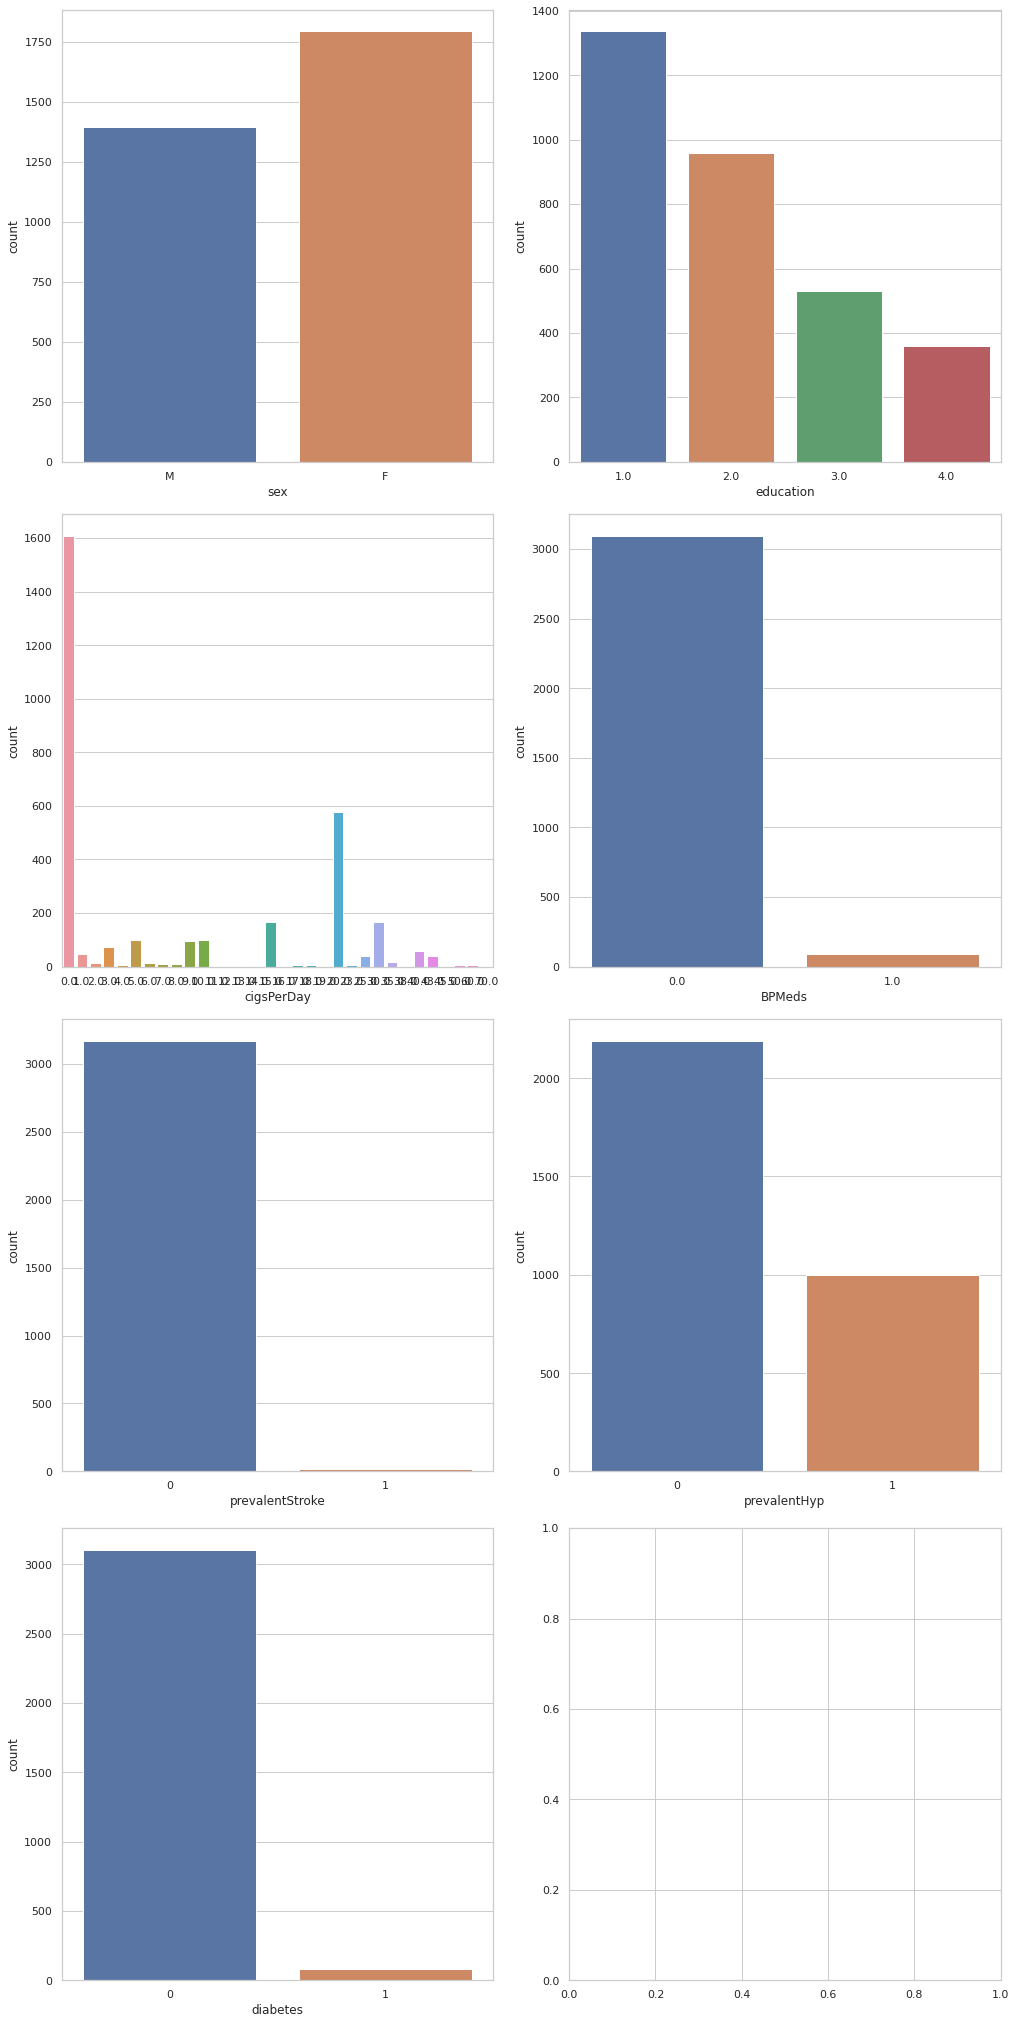

In [21]:
#BarGraph for Categorical Variables
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

Among the categorical features:

1. BPmeds, prevalentStroke and diabetes are highly imbalanced.
2. There are four levels of education whereas the rest categorical features are all binary
3. The number of Smokers and non-Smokers in currentSmoker is almost the same

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



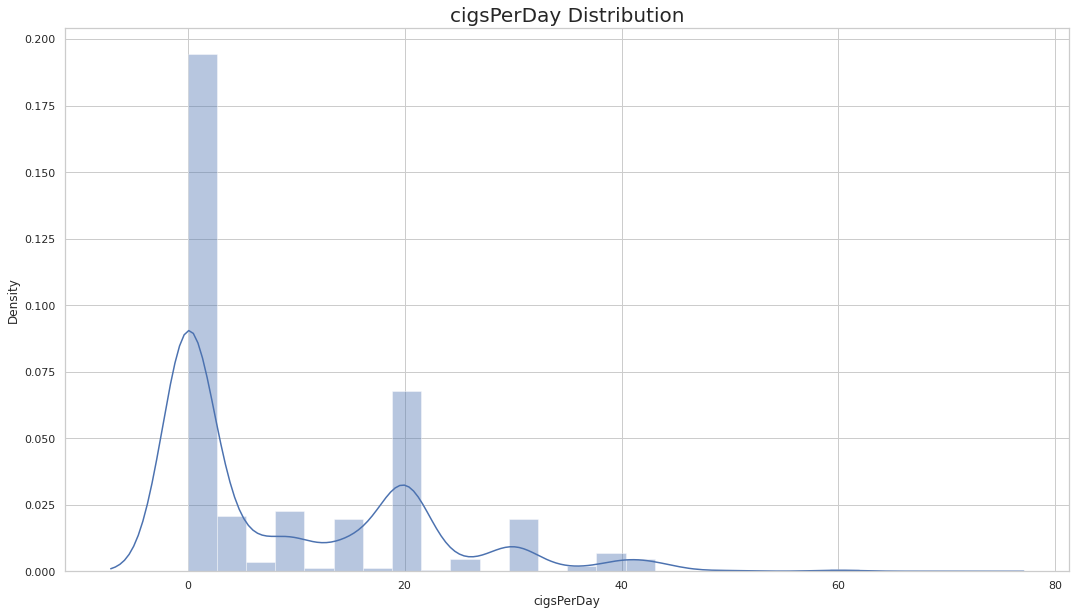

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



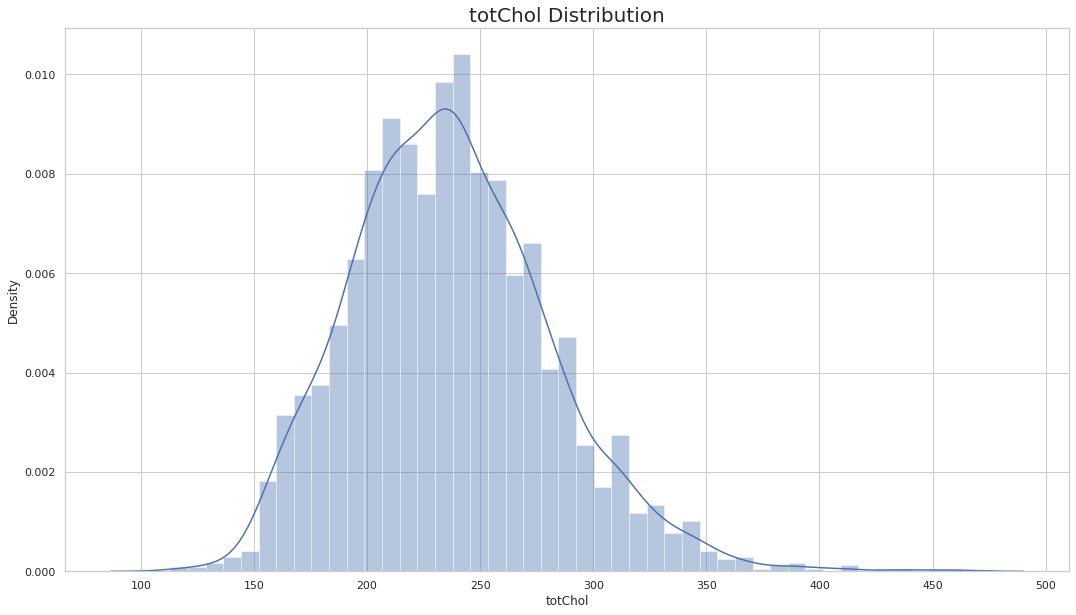

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



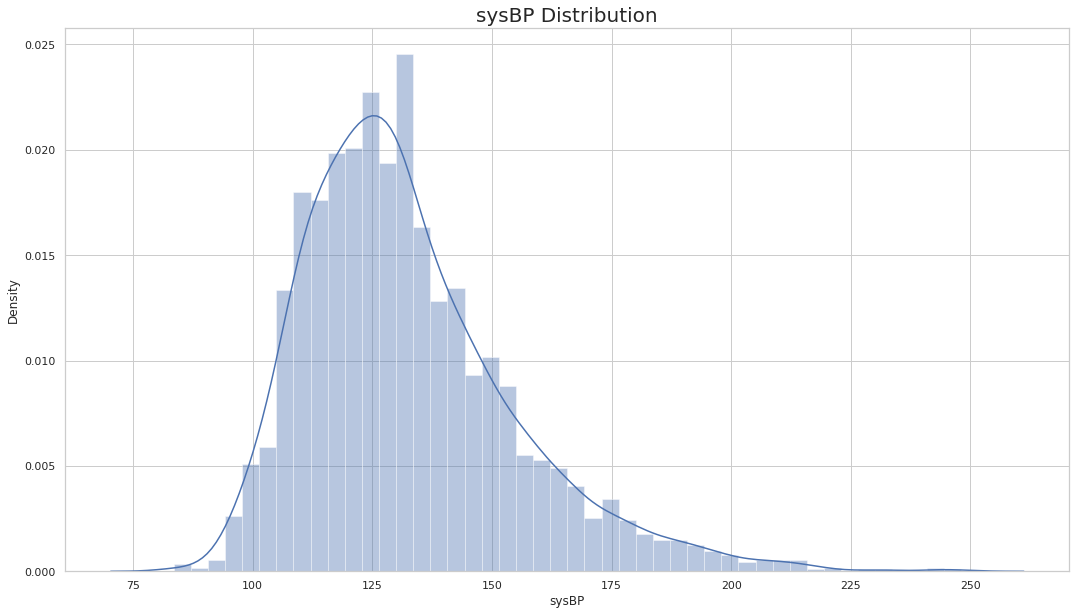

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



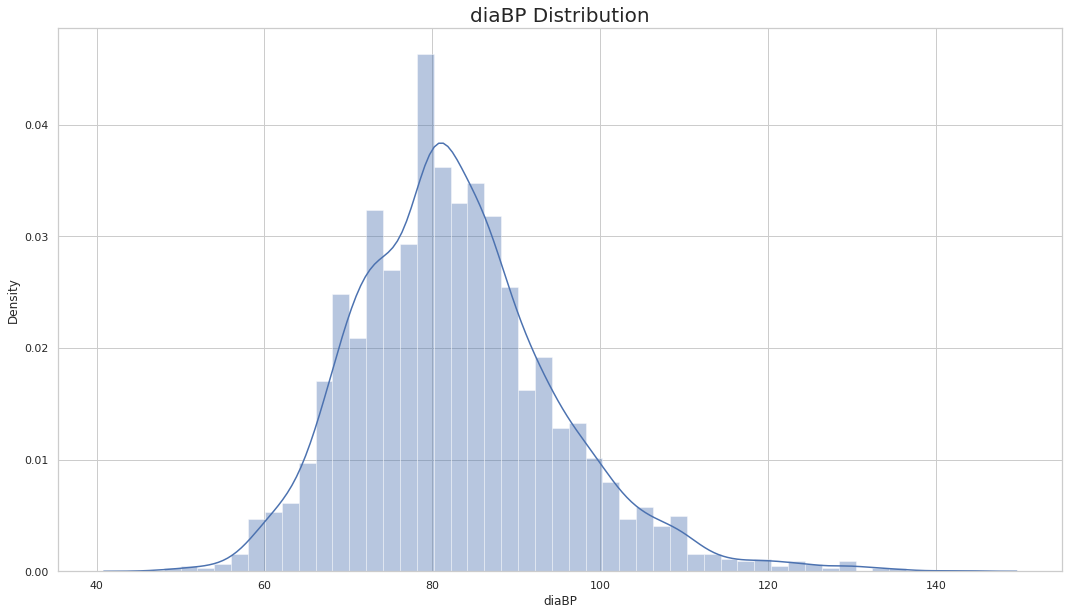

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



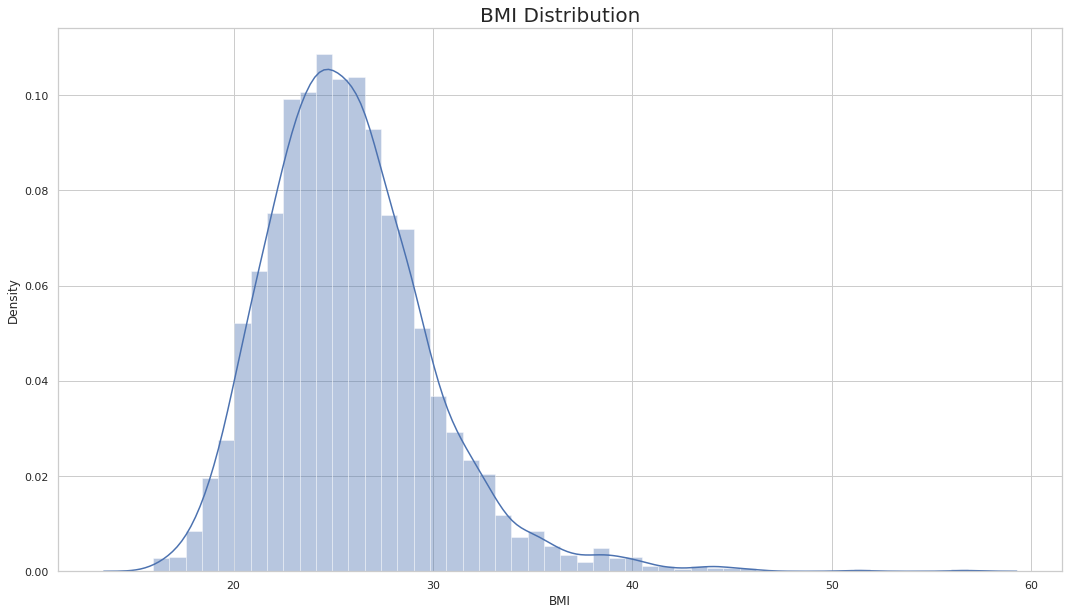

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



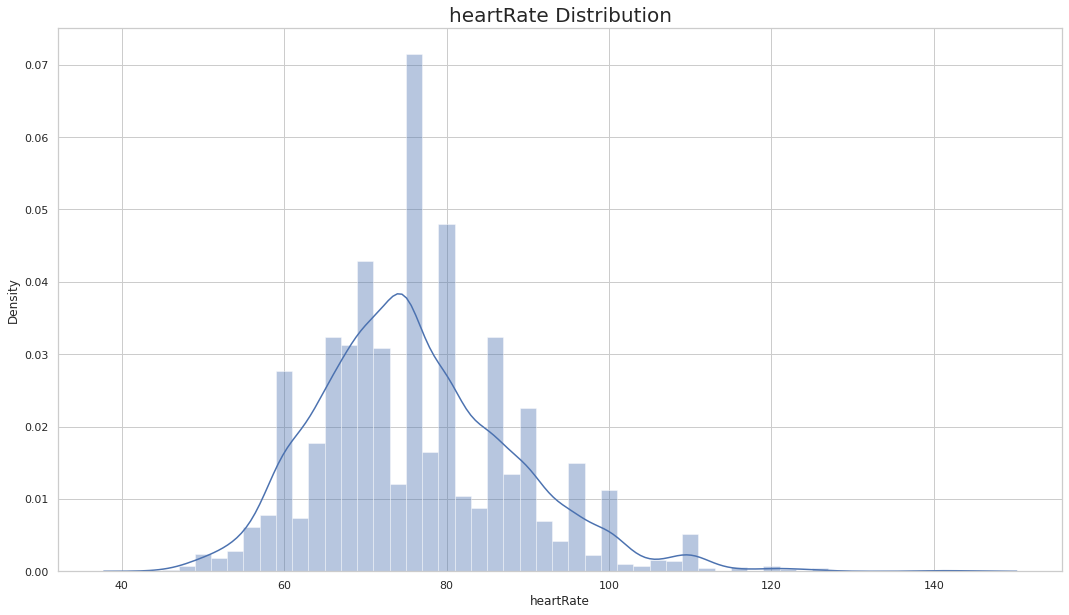

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



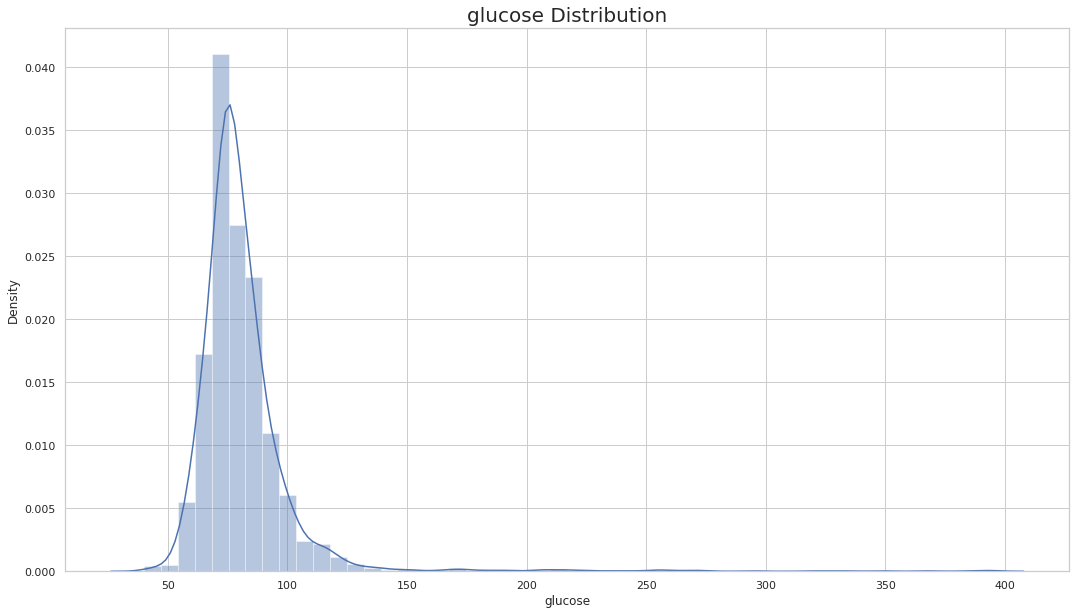

In [22]:
#Categorical Variables list with graph
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:

1. totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed
2. cigsPerDay has a highly uneven distribution with the most data present in 0
3. cigsPerDay and sysBP shows quite a bit and slight right skewness respectively.

<h1><b>Data Distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



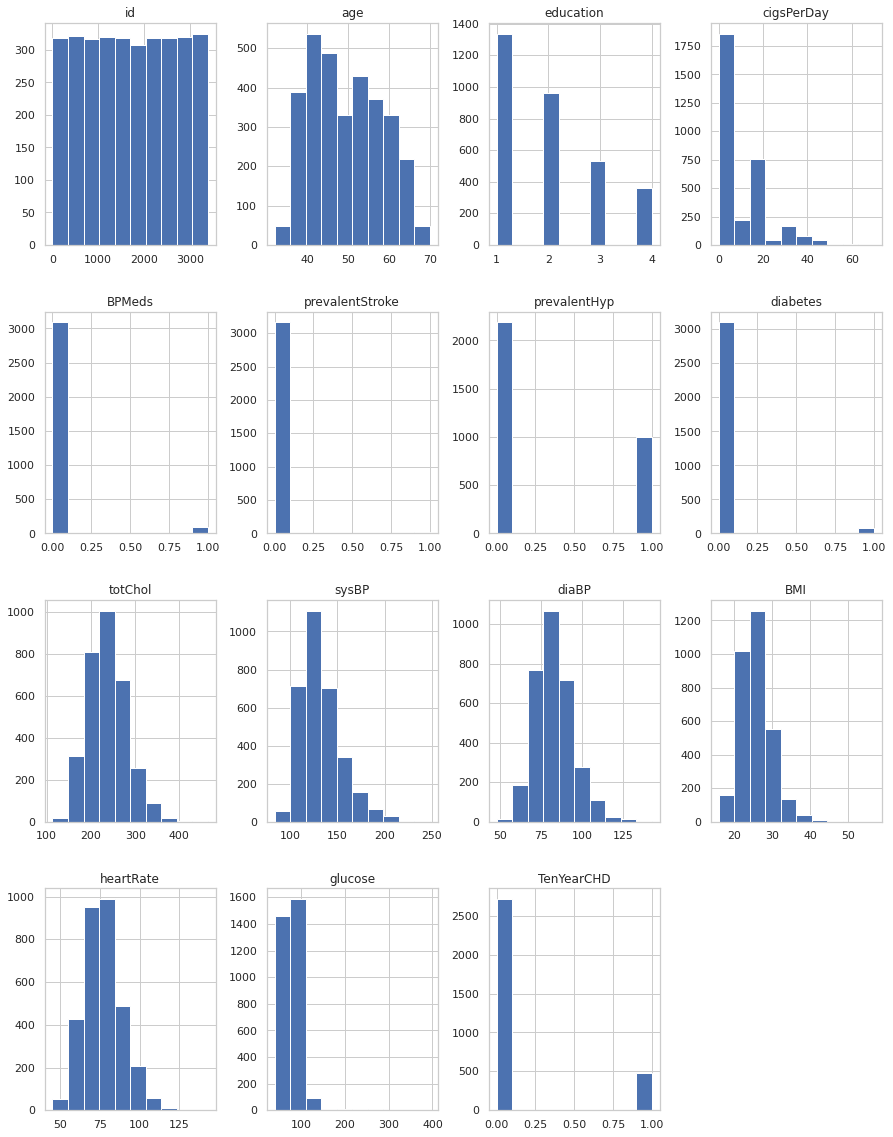

In [23]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

From the statistics above we have:

* The mean age of the participants of the study is 49 years, being 32 years the youngest participant and 70 years the oldest one.
* The partipant who smokes more, smokes an incredible amount of 70 cigarettes per day.
* Mean BMI is 25. Recalling that BMI stands for Body Mass Index. Levels above 25 and below 30 are considered overweight. Above 30, the patient is considered obese.
* The mean glucose level is 81, which falls within a normal glucose level

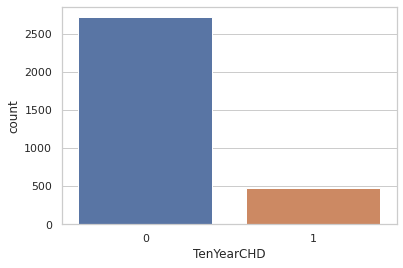

There are 2714 patients without heart disease and 473 patients with the disease


In [24]:
#TenYearCHD graph
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

The data is not properly balanced as the number of people without the disease greately exceeds the number of people with the disease. The ratio is about 1:5.57

In [25]:
data.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,1,2,3,4,5
id,1,2,3,4,5
age,36,46,50,64,61
education,4.000000,1.000000,1.000000,1.000000,3.000000
sex,M,F,M,F,F
is_smoking,NO,YES,YES,YES,NO
cigsPerDay,0.000000,10.000000,20.000000,30.000000,0.000000
BPMeds,0.000000,0.000000,0.000000,0.000000,0.000000
prevalentStroke,0,0,0,0,0
prevalentHyp,1,0,1,0,1
diabetes,0,0,0,0,0


,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.018961,-0.033326,-0.019599,0.009922,-0.039304,0.013195,0.003170,-0.014414,0.022757,0.000674,0.037260,0.022067,0.011048,0.010740
age,0.018961,1.000000,-0.166408,-0.184318,0.131968,0.043386,0.308066,0.106817,0.283792,0.401506,0.222285,0.134104,0.004266,0.107320,0.229073
education,-0.033326,-0.166408,1.000000,0.006984,-0.019054,-0.025963,-0.084455,-0.048924,-0.022472,-0.135254,-0.061289,-0.130679,-0.052302,-0.034676,-0.053068
cigsPerDay,-0.019599,-0.184318,0.006984,1.000000,-0.034978,-0.044309,-0.075611,-0.046544,-0.022103,-0.095560,-0.059887,-0.095397,0.058543,-0.060473,0.066273
BPMeds,0.009922,0.131968,-0.019054,-0.034978,1.000000,0.131047,0.258374,0.066869,0.089837,0.271986,0.203832,0.089156,0.019432,0.067775,0.094155
prevalentStroke,-0.039304,0.043386,-0.025963,-0.044309,0.131047,1.000000,0.062031,0.013629,-0.002510,0.055862,0.052285,0.024392,-0.012693,0.021540,0.047925
prevalentHyp,0.013195,0.308066,-0.084455,-0.075611,0.258374,0.062031,1.000000,0.073428,0.157881,0.699252,0.611440,0.303776,0.154183,0.082141,0.161863
diabetes,0.003170,0.106817,-0.048924,-0.046544,0.066869,0.013629,0.073428,1.000000,0.048192,0.107358,0.057833,0.083761,0.037056,0.609109,0.090987
totChol,-0.014414,0.283792,-0.022472,-0.022103,0.089837,-0.002510,0.157881,0.048192,1.000000,0.204350,0.161553,0.118705,0.085749,0.059050,0.089329
sysBP,0.022757,0.401506,-0.135254,-0.095560,0.271986,0.055862,0.699252,0.107358,0.204350,1.000000,0.782311,0.335020,0.181805,0.133197,0.206437


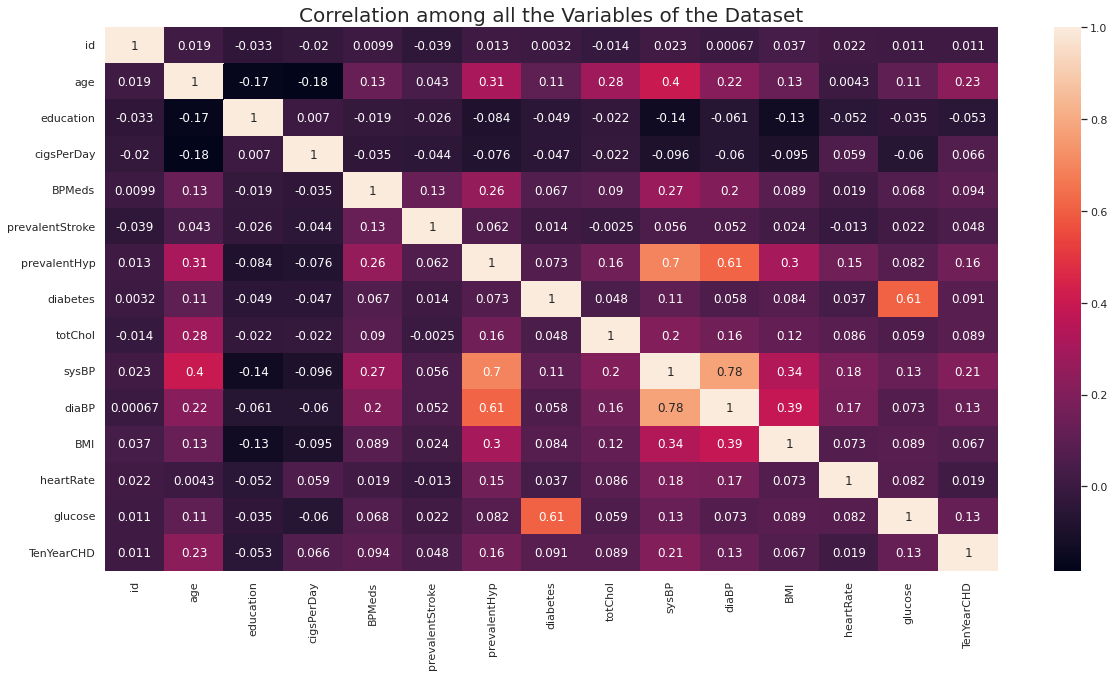

In [26]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension and systolic blood pressure

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Blood glucose and diabetes (obviously); systolic and diastolic blood pressures; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best features

Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative.

We are dropping the column education because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

In [27]:
# checking the distribution of Target Variable
data.TenYearCHD.value_counts()

0    2714
1     473
Name: TenYearCHD, dtype: int64

There are 2714 patients without heart disease and 473 patients with the disease.

1 --> Person have risk of coronary heart disease

0 --> Person do not have risk of coronary heart disease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



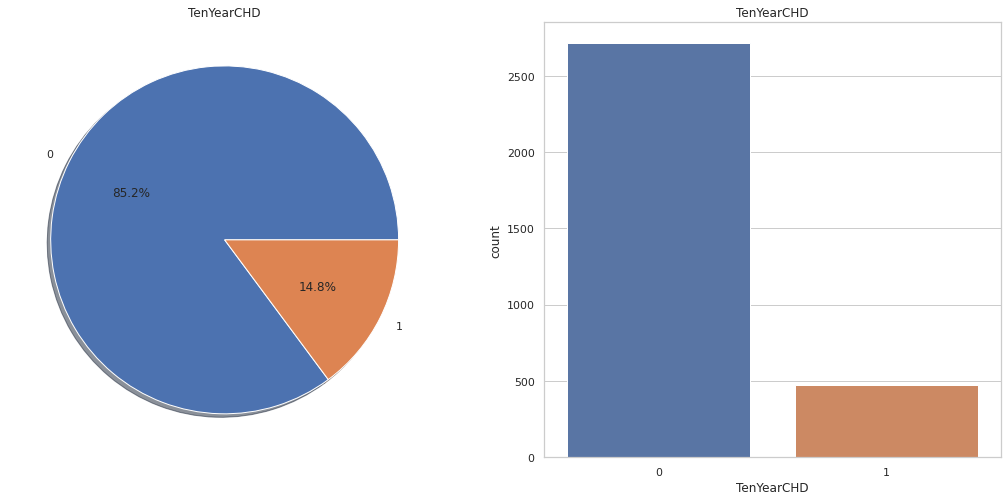

In [28]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(18,8))
data['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sns.countplot('TenYearCHD',data=data,ax=ax[1])
ax[1].set_title('TenYearCHD')
plt.show()

We can see from the above figure that we have the imbalanced data set as the number of people without the disease greatly exceeds the number of people with the disease.

Let's look at the number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease.

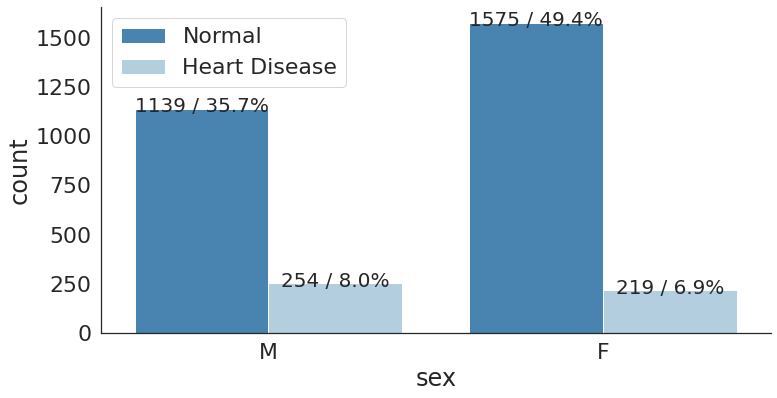

In [29]:
labels = ['Normal','Heart Disease']
total_cnt = data['TenYearCHD'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='sex',hue='TenYearCHD',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

Creating age groups

In [30]:
data['age'].unique()

array([36, 46, 50, 64, 61, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35, 54,
       41, 62, 47, 34, 39, 59, 45, 49, 60, 40, 48, 37, 52, 57, 67, 65, 33,
       66, 68, 69, 70, 32])

Ages range from 32 to 70 so the following age groups will be created:

* 30-39 years
* 40-49 years
* 50-59 years
* 60-70 years

In [31]:
data['ageGroup'] = pd.cut(x=data['age'], bins=[30, 39, 49, 59, 70], 
                          labels=['30-39 years', '40-49 years', '50-59 years', '60-70 years'])
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,30-39 years
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,40-49 years
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,50-59 years
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,60-70 years
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,60-70 years


In [32]:
data_cat= data.copy()
data_cat['sex'] = data_cat['sex'].map({'F':0,'M':1})
data_cat['TenYearCHD'] = data_cat['TenYearCHD'].map({0:'negative', 1:'positive'})   
data_cat['diabetes']= data_cat['diabetes'].map({0:'negative', 1:'positive'}) 
data_cat['education']=data_cat['education'].map({1:'Some High School', 2:'High School or GED', 
                                                 3:'Some College or Vocational School', 4:'College'})
data_cat['is_smoking'] = data_cat['is_smoking'].map({'NO':0,'YES':1})
data_cat.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
1,1,36,College,1,0,0.0,0.0,0,1,negative,212.0,168.0,98.0,29.77,72.0,75.0,negative,30-39 years
2,2,46,Some High School,0,1,10.0,0.0,0,0,negative,250.0,116.0,71.0,20.35,88.0,94.0,negative,40-49 years
3,3,50,Some High School,1,1,20.0,0.0,0,1,negative,233.0,158.0,88.0,28.26,68.0,94.0,positive,50-59 years
4,4,64,Some High School,0,1,30.0,0.0,0,0,negative,241.0,136.5,85.0,26.42,70.0,77.0,negative,60-70 years
5,5,61,Some College or Vocational School,0,0,0.0,0.0,0,1,negative,272.0,182.0,121.0,32.80,85.0,65.0,positive,60-70 years


Text(0.5, 1.0, 'Age Distrubution')

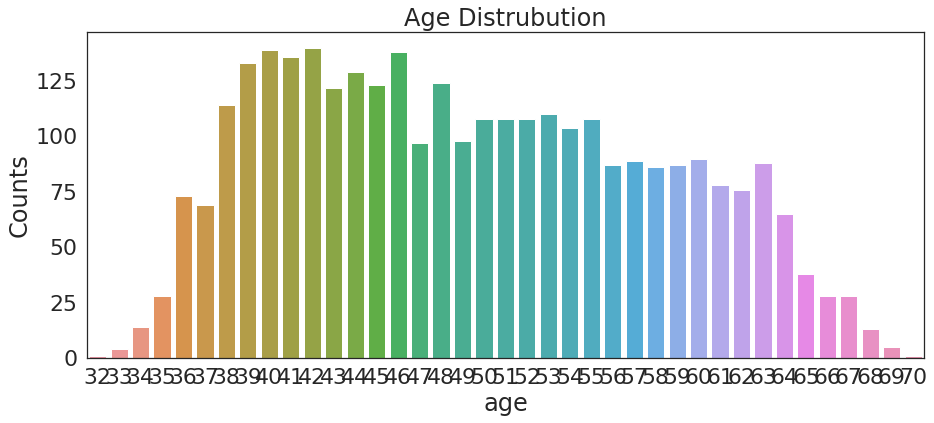

In [33]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('Age Distrubution')

As we can see in above plot The people with the highest risk of developing heart disease are betwwen the ages of 51 and 63.

Because the number of sick people generally increases with age.

Text(0.5, 1.0, 'Age wise Effected People')

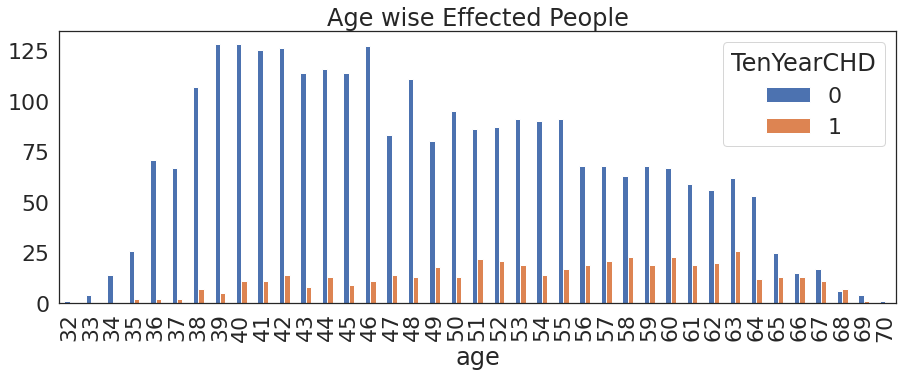

In [34]:
plt.rcParams['figure.figsize'] = (15, 5)
data.groupby(['age','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Age wise Effected People')

In [35]:
from operator import add
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
  # Function to plot stacked bar chart
    default_colors = ['#005300', '#FA0000', '#267B45']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

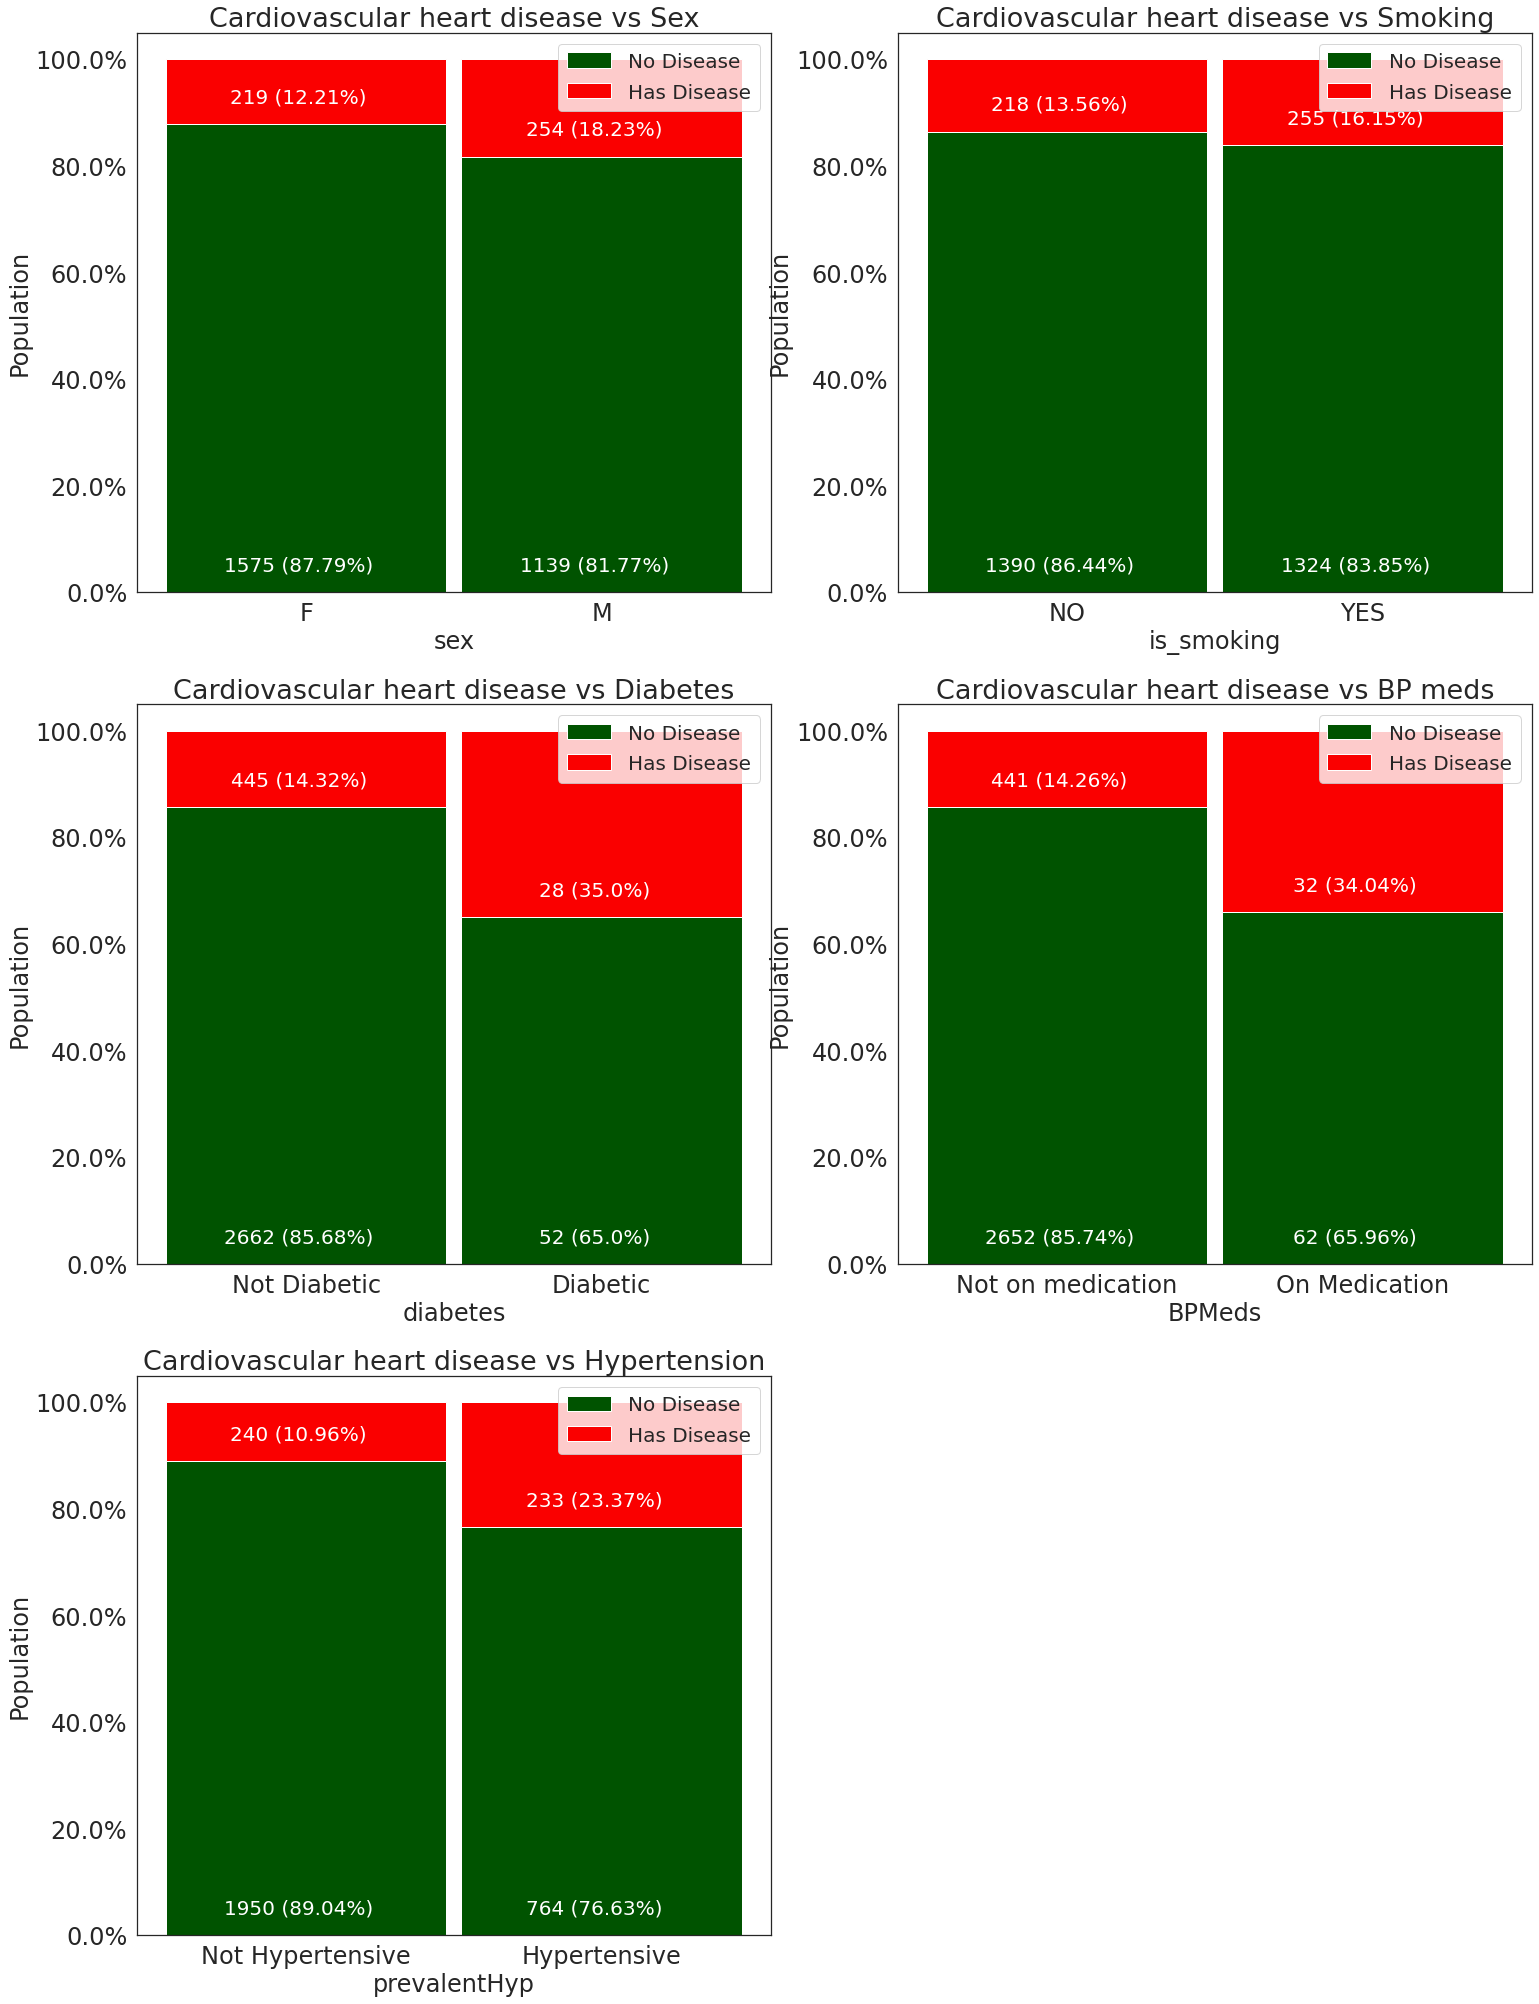

In [36]:
# Visualzing each category with respect to target variable
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#Plot sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['sex','TenYearCHD']].groupby(['sex','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Sex', ylabel = 'Population')

#Plot smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['is_smoking','TenYearCHD']].groupby(['is_smoking','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Smoking', ylabel = 'Population')

#Plot diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Diabetes', ylabel = 'Population')

#Plot BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs BP meds', ylabel = 'Population')

#Plot Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Hypertension', ylabel = 'Population')

From the above categorical variables comparison plot we can conclude that,

1. Slightly more males are suffering from Cardiovascular heart disease than females.
2. The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
3. The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.
4. The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication.

In [37]:
data_cat['Count_10YCHD'] = 1
data_cat.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup,Count_10YCHD
1,1,36,College,1,0,0.0,0.0,0,1,negative,212.0,168.0,98.0,29.77,72.0,75.0,negative,30-39 years,1
2,2,46,Some High School,0,1,10.0,0.0,0,0,negative,250.0,116.0,71.0,20.35,88.0,94.0,negative,40-49 years,1
3,3,50,Some High School,1,1,20.0,0.0,0,1,negative,233.0,158.0,88.0,28.26,68.0,94.0,positive,50-59 years,1
4,4,64,Some High School,0,1,30.0,0.0,0,0,negative,241.0,136.5,85.0,26.42,70.0,77.0,negative,60-70 years,1
5,5,61,Some College or Vocational School,0,0,0.0,0.0,0,1,negative,272.0,182.0,121.0,32.80,85.0,65.0,positive,60-70 years,1


In [38]:
data_pv = data_cat.pivot_table('Count_10YCHD', ['sex', 'TenYearCHD'], aggfunc="sum").reset_index()
data_pv.head()

,sex,TenYearCHD,Count_10YCHD
0,0,negative,1575
1,0,positive,219
2,1,negative,1139
3,1,positive,254


In [39]:
fig1 = px.bar(data_pv, x="sex", y = 'Count_10YCHD', color='TenYearCHD', 
              color_discrete_sequence=['DodgerBlue', 'Crimson'], 
              width = 700, height=500)

#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig1.update_layout(barmode='stack', title={'text': 'Ten Year CHD Probabilities by Gender', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig1.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))

fig1.show()

In [40]:
data_pv_ed = data_cat.pivot_table('Count_10YCHD', ['education', 'TenYearCHD'], aggfunc="sum").reset_index()
data_pv_ed.head()

,education,TenYearCHD,Count_10YCHD
0,College,negative,310
1,College,positive,50
2,High School or GED,negative,846
3,High School or GED,positive,113
4,Some College or Vocational School,negative,463


In [41]:
fig2 = px.bar(data_pv_ed, x="education", y = 'Count_10YCHD', color='TenYearCHD', 
              color_discrete_sequence=['DodgerBlue', 'Crimson'], 
              width=700, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig2.update_layout(barmode='stack', title={'text': 'Ten Year CHD Probabilities by Education Level', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig2.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig2.show()

We must remember that correlation does not mean causation. It seems that the incidence of heart disease is more pronounced in the group with lower educational level, but we must investigate the causes for that. This dataset comprises patients from the USA, a country where not everyone has access to healthcare. The population with lower education level is more prone to not having access to healthcare, because of their job situation.

In [42]:
data_gp_cs = data_cat.pivot_table('is_smoking', ['sex', 'ageGroup'], aggfunc="sum").reset_index()
data_gp_cs.head(10)

,sex,ageGroup,is_smoking
0,0,30-39 years,126
1,0,40-49 years,347
2,0,50-59 years,180
3,0,60-70 years,62
4,1,30-39 years,135
5,1,40-49 years,378
6,1,50-59 years,250
7,1,60-70 years,101


In [43]:
fig3 = px.bar(data_gp_cs, x= 'ageGroup', y="is_smoking", color='sex', 
              color_discrete_sequence=['firebrick', 'dimgray' ], 
              width=900, height=600)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig3.update_layout(barmode='stack', title={'text': 'Number of Current Smokers by Gender and Age Group', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig3.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))

fig3.show()

In all age groups, men smoke more than women. We have a total of 4240 patients in the dataset, of which 1788 are smokers, this is 42% of the dataset.

Checking the relation between some health conditions (diabetes, hypertension, stroke) in the incidence of heart disease.

In [44]:
data_conditions = data_cat.pivot_table('Count_10YCHD', ['diabetes', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD'], aggfunc="sum").reset_index()
data_conditions['diabetes'] = data_conditions['diabetes'].replace(['positive','negative'], ['Diabetic','Non-Diabetic'])
data_conditions['prevalentHyp']=data_conditions['prevalentHyp'].replace([0,1],['Not Hypertensive', 'Hypertensive'])
data_conditions['prevalentStroke']=data_conditions['prevalentStroke'].replace([0,1],['Never had a stroke', 'Has had a stroke'])
data_conditions.head(14)

,diabetes,prevalentStroke,prevalentHyp,TenYearCHD,Count_10YCHD
0,Non-Diabetic,Never had a stroke,Not Hypertensive,negative,1916
1,Non-Diabetic,Never had a stroke,Not Hypertensive,positive,230
2,Non-Diabetic,Never had a stroke,Hypertensive,negative,734
3,Non-Diabetic,Never had a stroke,Hypertensive,positive,209
4,Non-Diabetic,Has had a stroke,Not Hypertensive,negative,5
5,Non-Diabetic,Has had a stroke,Not Hypertensive,positive,1
6,Non-Diabetic,Has had a stroke,Hypertensive,negative,7
7,Non-Diabetic,Has had a stroke,Hypertensive,positive,5
8,Diabetic,Never had a stroke,Not Hypertensive,negative,29
9,Diabetic,Never had a stroke,Not Hypertensive,positive,9


In [45]:
data_hyp = data_conditions.groupby(['prevalentHyp', 'TenYearCHD']).sum().reset_index()
data_hyp.head()

,prevalentHyp,TenYearCHD,Count_10YCHD
0,Hypertensive,negative,764
1,Hypertensive,positive,233
2,Not Hypertensive,negative,1950
3,Not Hypertensive,positive,240


In [46]:
fig4 = px.bar(data_hyp, x= 'TenYearCHD', y="Count_10YCHD", color='prevalentHyp', 
              color_discrete_sequence=['yellow', 'midnightblue' ], 
              width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig4.update_layout(barmode='stack', title={'text': 'Prevalent Hypertension and Probability of CHD', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig4.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig4.show()

In [47]:
data_dia = data_conditions.groupby(['diabetes', 'TenYearCHD']).sum().reset_index()
data_dia.head()

,diabetes,TenYearCHD,Count_10YCHD
0,Diabetic,negative,52
1,Diabetic,positive,28
2,Non-Diabetic,negative,2662
3,Non-Diabetic,positive,445


In [48]:
fig5 = px.bar(data_dia, x= 'TenYearCHD', y="Count_10YCHD", color='diabetes', 
              color_discrete_sequence=['yellow', 'midnightblue' ], 
              width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig5.update_layout(barmode='stack', title={'text': 'Diabetes and Probability of CHD', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig5.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig5.show()

In [49]:
data_str = data_conditions.groupby(['prevalentStroke', 'TenYearCHD']).sum().reset_index()
data_str.head()

,prevalentStroke,TenYearCHD,Count_10YCHD
0,Has had a stroke,negative,12
1,Has had a stroke,positive,7
2,Never had a stroke,negative,2702
3,Never had a stroke,positive,466


In [50]:
fig6 = px.bar(data_str, x= 'TenYearCHD', y="Count_10YCHD", color='prevalentStroke', 
              color_discrete_sequence=['yellow', 'midnightblue' ], 
              width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig6.update_layout(barmode='stack', title={'text': 'Prevalent Stroke and Probability of CHD', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig6.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig6.show()

BMI, Cholesterol, Glucose and heart rate levels by age group

In [51]:
fig7 = px.box(data_cat, x="ageGroup", y="totChol", color_discrete_sequence=['DarkTurquoise'], width=900, height=600)
fig7.update_layout(
    title={
        'text': "Total Cholesterol by age group",
        'x':0.5,
        'xanchor': 'center'})

fig7.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)
fig7.show()

In [52]:
fig8 = px.box(data_cat, x="ageGroup", y="BMI",color_discrete_sequence=['Coral'], width=900, height=600)
fig8.update_layout(
    title={
        'text': "BMI by age group",
        'x':0.5,
        'xanchor': 'center'})
fig8.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)
fig8.show()

In [53]:
fig9 = px.box(data_cat, x="ageGroup", y="glucose", color_discrete_sequence=['Navy'], width=900, height=600)
fig9.update_layout(
    title={
        'text': "Glucose by age group",
        'x':0.5,
        'xanchor': 'center'})
fig9.show()


In [54]:
fig10 = px.box(data_cat, x="ageGroup", y="heartRate", color_discrete_sequence=['MediumVioletRed'], width=900, height=600)
fig10.update_layout(
    title={
        'text': "Heart rate by age group",
        'x':0.5,
        'xanchor': 'center'})
fig10.show()

In [55]:
trace0 = go.Box(x=data_cat['ageGroup'],y=data_cat['sysBP'], 
                name='Systolic Blood Pressure', line=dict(color='steelblue'))
trace1 = go.Box(x=data_cat['ageGroup'], y=data_cat['diaBP'], 
                name='Diastolic Blood Pressure', line=dict(color='goldenrod'))

fig11 = go.Figure([trace0, trace1])
fig11.update_layout(
    title={
        'text': "Blood Pressure by Age Group",
        'x':0.5,
        'xanchor': 'center'})
fig11.show()

From the boxplots we can see that:

* Age group 30-39 years seem to have lower levels of total cholesterol, with median of 210.
* A patient in age group 50-59 has a very high totChol level, of 600
* The median for age group 60-70 years was the highest of all: 247.5, the second age group on this list was 50-59 years, following the trend that total cholesterol levels tend to be higher in an older population.

<h1><b>EDA Summary: 

* Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
* Data has no missing values
* Features (columns) data type: 
    * Six features are numerical 
    * The rest (seven features) are categorical variables
* Target variable is fairly balanced, 54% no-disease to 46% has-disease
* Correlations:
    * Correlation between features is weak at best
    * From the numerical features `num_major_vessels`, `max_heart_rate_achieved` and `st_depression` are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
    * From the categorical features `chest_pain_type`, `num_major_vessels`, `thalassemia`, and `exercise_induced_angina` are better correlated with the target variable, `thalassemia` being the highest at 0.52.
    * Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease. 
    
**Takeaway**: features that have higher predictive power could be, **`chest_pain_type`, `num_major_vessels`, `thalassemia`, `exercise_induced_angina` `max_heart_rate_achieved`** and **`st_depression`**. We will see which features will appear as imporatnt by the classification models.

Feature selection with different methods

As we have a dataset which is not too large, and this notebook aims to show a bit of theory on Machine Learning and Data Analysis, let's test different feature selection methods (code below was sourced from this medium post in Towards Data Science):

In [56]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,30-39 years
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,40-49 years
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,50-59 years
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,60-70 years
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,60-70 years


In [57]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,30-39 years
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,40-49 years
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,50-59 years
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,60-70 years
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,60-70 years


As an attempt to improve the results of the feature selection methods below, education will be dropped from the data as this is not related to a behavioural or medical history attribute. Gender will be kept so as to analyse the relationship between gender and heart disease. ageGroup will also be dropped as this variable was created only to visualize data on the previous section.

In [58]:
data.drop(['education', 'ageGroup'],axis=1,inplace=True)
data.head()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [59]:
data['sex'] = data['sex'].map({'F':0,'M':1})
data['is_smoking'] = data['is_smoking'].map({'NO':0,'YES':1})

In [60]:
data.head()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [61]:
#predictors:
X=data.iloc[:,0:14]

#label:
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (3187, 14) 
y -  (3187,)


In [62]:
#To reduce the number of features from 15 to 10:
num_feats=10

Filter Method: Chi-square

A filter method selects subsets of features based on their relationship with the target variable. There are statistical methods and feature importance methods in this classification.

In this problem we have a categorical output and numerical and categorical inputs. According to this post on Machine Learning Mastery blog, for categorical classification problems a recommended filter method is chi-square method.

In [63]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(score_func=chi2, k=num_feats)
fit = chi_selector.fit(X_norm,y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [64]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs      Score
7      prevalentHyp  57.377337
5            BPMeds  27.420105
8          diabetes  25.721582
1               age  18.485287
2               sex  12.684687
10            sysBP   8.166451
6   prevalentStroke   7.276362
4        cigsPerDay   3.091865
11            diaBP   2.469006
3        is_smoking   2.137156
9           totChol   1.136557


Wrapped method: RFE
RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

In this method we will use a Logistic regression model, so it will be necessary to use the normalized input. As stated on the book "Feature Engineering":

Models that are smooth functions of the input, such as linear regression, logistic regression, or anything that involves a matrix, are affected by the scale of the input.

In [65]:
from sklearn.feature_selection import RFE

In [66]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
#rfe_selector = RFE(estimator=LogisticRegression(), step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 14 features.
10 selected features


In [67]:
rfe_feature

['age',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP']

Embedded method : Decision Tree
Embedded methods combine features from filter and wrapper methods. In this case, there is no need to scale the input, as tree-based models are not affected by the scale.

In [68]:
from sklearn.feature_selection import SelectFromModel

In [69]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [70]:
embeded_rf_feature

['id', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']

Let's see a comparison:

In [71]:
feature_name = list(X.columns)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,'Chi-2':chi_support, 'RFE':rfe_support, 
                                     'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(15)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Feature,Chi-2,RFE,Random Forest,Total
1,sysBP,True,True,True,3
2,age,True,True,True,3
3,totChol,False,True,True,2
4,sex,True,True,False,2
5,prevalentStroke,True,True,False,2
6,prevalentHyp,True,True,False,2
7,is_smoking,True,True,False,2
8,diabetes,True,True,False,2
9,diaBP,True,False,True,2
10,cigsPerDay,True,True,False,2


<b>Features to consider</b> The only method that considered <b>sysBP</b> and <b>diaBP</b> as relevant was chi-squared method. The blood pressure of a patient is given by these two measures, so it does not make sense to consider one and not the other. Another thing to consider is the variable BPMeds that states whether the patient is on blood pressure medication. I am considering that this variable is also important because if the patient is already on blood pressure medication it means that it is at a higher risk of developing heart diseases.

* For the reasons state above, the final features for the model will be the ones chosen by chi-squared method including totChol because this variable gives total cholesterol levels and may be relevant.

1. prevalentHyp
2. diabetes
3. BPMeds (whether the patient was on blood pressure medication - this indicates the patient is hypertensive, which can be considered as a ramification of prevalentHyp, sysBP and diaBP variables)
4. age
5. Gender
6. sysBP (systolic blood pressure)
7. prevalentStroke
8. diaBP (diastolic blood pressure)
9. cigsperday
10. glucose
11. totChol

Features to exclude:

* BMI
* currentSmoker (redundandt with cigsperday)
* heartRate (only one method chose this one)

Preparing the model for Machine Learning

Separating the data

In [72]:
data.head()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [73]:
#Creating a dataset with only the features selected 
data_features = data.drop(['id','is_smoking', 'BMI', 'heartRate'], axis=1)
data_features.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
1,36,1,0.0,0.0,0,1,0,212.0,168.0,98.0,75.0,0
2,46,0,10.0,0.0,0,0,0,250.0,116.0,71.0,94.0,0
3,50,1,20.0,0.0,0,1,0,233.0,158.0,88.0,94.0,1
4,64,0,30.0,0.0,0,0,0,241.0,136.5,85.0,77.0,0
5,61,0,0.0,0.0,0,1,0,272.0,182.0,121.0,65.0,1


In [74]:
X = data_features.iloc[:, 0:11].values 
y = data_features.iloc[:, 11].values 

Scaling the attributes

Apart from decision tree and random forest classifiers the other classifiers that will be tested require scaled data.

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
seed = 0

Train Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<h1><b>Performance metric</b>

There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the '*appropriate*' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, *accuracy* can be the right choice and in some other case a *recall* or *precision* could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease). 

**Confusion matrix** : A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an *actual* class while each column represents the instances in a *predicted* class [[wiki](https://en.wikipedia.org/wiki/Confusion_matrix)]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

<div>    
<img src="https://miro.medium.com/max/875/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" width="350", align="center"/>  
</div>

[Image credit >>](https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa)

**Key**: 

|**Term** |**Meaning** | **Descriptions**| 
| --- |---|---|
|TP |True Positive|Positive cases which are predicted as positive|
|FP |False Positive|Negative cases which are predicted as positive|
|TN |True Negative|Negative cases which are predicted as negative|
|FN |False Negative|Positive casea which are predicted as negative|


**Accuracy** : Measures how many of the cases are correctly identified/predicted by the model, i.e correct prediction divided by the total sample size. Accuracy is not a good metric in this study because we have unbalanced classes. 


$\frac{TP + TN}{TP +TN + FP + FN}$

**Recall**: Measures the rate of *true positives*, i.e how many of the *actual* positive cases are *identified/predicted* as positive by the model. This is the fraction of samples from a class which are correctly predicted by the model, also called *Sensitivity* or *True Positive Rate*. 


$\frac{TP}{(TP + FN)}$

**Precision**: Measures how many of the positive predicted cases are actually positive. Precision is a better for this type of unbalanced dataset than accuracy. This is a measure of classifier exactness, a low precision can also indicate a large number of false positives. Precision is shown for each class as this is a measure of true positives divided by true positives plus false positives. 

$\frac{TP}{(TP + FP)}$

**F1-Score** : Combines the precision and recall of the model and it is defined as the harmonic mean of the model’s precision and recall. This is a tradeoff between precision and recall - it is the harmonic mean of precision and recall. This is a good metric for unbalanced data. The higher the F1-Score, the better. Again, for the "No risk of CHD" class the results of this metric were good, all equal or above 90% but for the "Risk of CHD" class they were too low. 

$\frac{recall * precision}{recall + precision}$




<h1><b>Evaluating the metrics

<b>Accuracy</b>

Accuracy is not a good metric in this study because we have unbalanced classes. Just as a reminder, accuracy is the number of correct predictions divided by the total number of examples. 

<b>Precision</b>

Precision is a better for this type of unbalanced dataset than accuracy. This is a measure of classifier exactness, a low precision can also indicate a large number of false positives. Precision is shown for each class as this is a measure of true positives divided by true positives plus false positives. 

All machine learning models tested for this case had a bad precision for the "Risk of CHD" class, most of them below 50%. Logistic regression had the 'best' result (64%) but still it is a low precision considering we are dealing with a model on medical data. 
As for the "No risk of CHD" class, Naive bayes had the best precision, of 86% ,followed by XGBoost and KNN (85%) and Logistic regression and Random Forest (84%). Also this is not good considering we are dealing with health data.

<b>Recall</b> 

This is the fraction of samples from a class which are correctly predicted by the model, also called *Sensitivity* or *True Positive Rate*. 

All ML models tested in this project had good recall rates, above 90%, for the "No risk of CHD" class. On the other hand, for the 'Risk of CHD' class the results were not good. The recall rates are too low, which indicates we have several false negatives. 

<b>F1-Score</b>
 
This is a tradeoff between precision and recall - it is the harmonic mean of precision and recall. This is a good metric for unbalanced data. The higher the F1-Score, the better. Again, for the "No risk of CHD" class the results of this metric were good, all equal or above 90% but for the "Risk of CHD" class they were too low. 

<b> *We can conclude that the model has too many wrong estimations, mainly for the "Risk of CHD" class due to the imbalanced nature of this dataset. We have much less examples of patients at risk of developing CHD than the other class. It will be necessary to use a technique to deal with this type of dataset and try again. Logistic regression overrall was the best model because it was the one with the least worst results for the negative class.*</b>

<h1><b>Machine Learning Models
Classification algorithms (Model + Validation + Evaluation)</b>

<h1><b>Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a logit transformation of the probability of presence of the characteristic of interest:

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

confussion matrix
[[670   4]
 [114   9]]


Accuracy of Logistic Regression: 85.19447929736512 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       674
           1       0.69      0.07      0.13       123

    accuracy                           0.85       797
   macro avg       0.77      0.53      0.53       797
weighted avg       0.83      0.85      0.80       797





Text(56.49999999999999, 0.5, 'Actual')

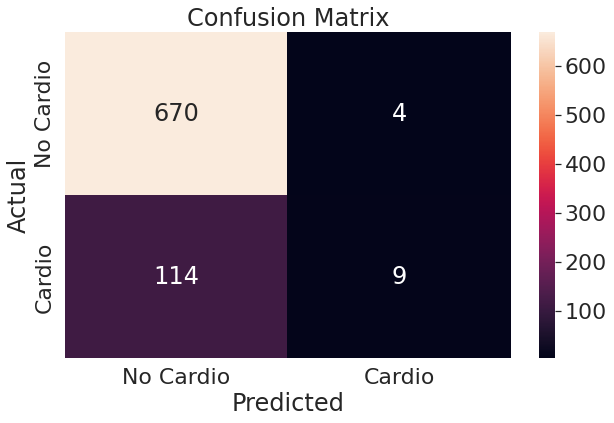

In [80]:
m1 = 'LogisticRegression'

# Fitting the model with train data
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(X_train, y_train)

# Predicting the target
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")

#Evaluating the Results
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
print("\n")

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, lr_predict)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



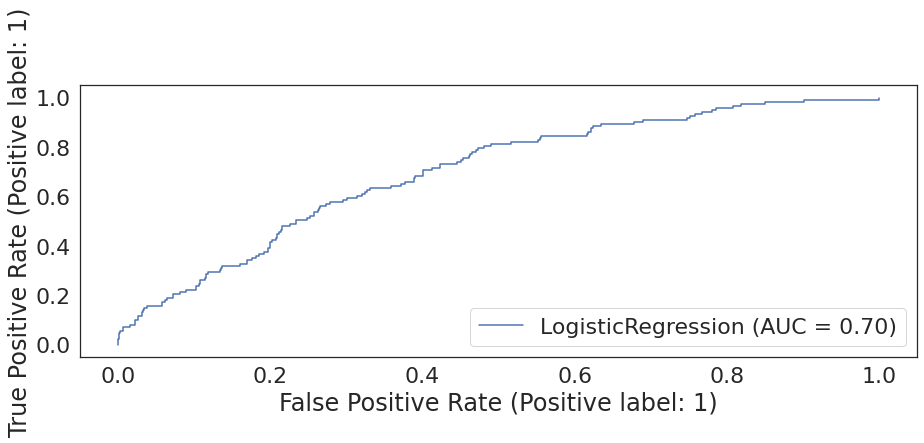

In [81]:
from sklearn.metrics import plot_roc_curve
#Plotting roc curve
plot_roc_curve(lr,X_test,y_test)
plt.show()

<h1><b>k-Nearest Neighbours</b>

The k-nearest-neighbors is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

confussion matrix
[[574 100]
 [ 98  25]]


Accuracy of k-NN Classification: 75.15683814303638 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       674
           1       0.20      0.20      0.20       123

    accuracy                           0.75       797
   macro avg       0.53      0.53      0.53       797
weighted avg       0.75      0.75      0.75       797





Text(56.49999999999999, 0.5, 'Actual')

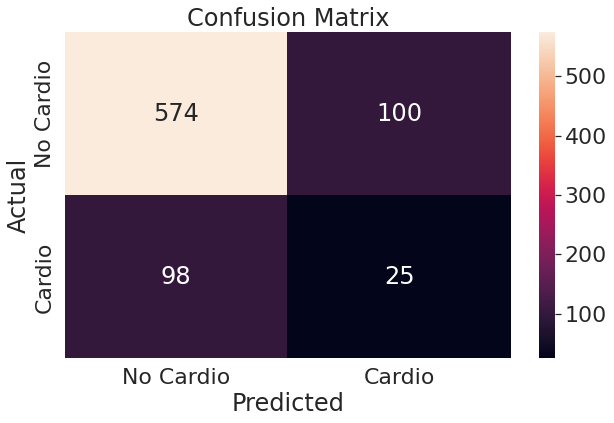

In [82]:
m2 = 'KNeighborsClassifier'

# Fitting the model with train data
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)

# Predicting the target
knn_predict = knn.predict(X_test)

#Evaluating the Results
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))
print("\n")

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, knn_predict)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



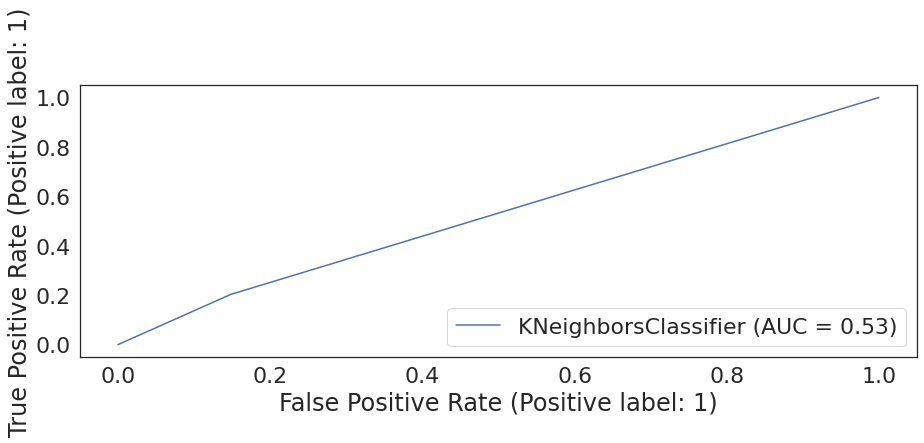

In [83]:
#Plotting roc curve
plot_roc_curve(knn,X_test,y_test)
plt.show()

<h1><b>Random Forest</b>

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. 

Before understanding the working of the random forest we must look into the ensemble technique. Ensemble simply means combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

confussion matrix
[[662  12]
 [115   8]]


Accuracy of Random Forest: 84.06524466750314 

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       674
           1       0.40      0.07      0.11       123

    accuracy                           0.84       797
   macro avg       0.63      0.52      0.51       797
weighted avg       0.78      0.84      0.79       797





Text(56.49999999999999, 0.5, 'Actual')

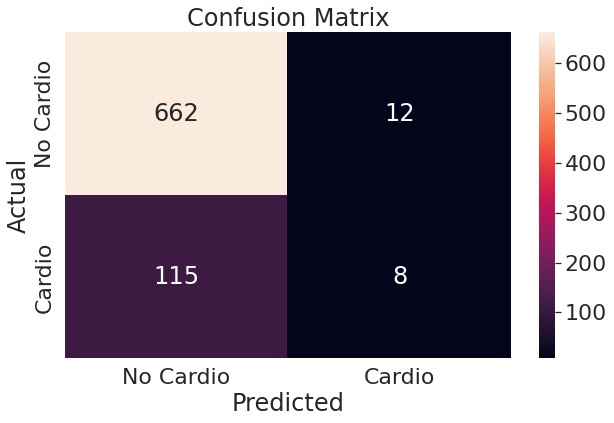

In [84]:
m3 = 'Random Forest Classfier'

# Fitting the model with train data
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(X_train,y_train)

# Predicting the target
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

#Evaluating the Results
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
print("\n")

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, rf_predicted)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



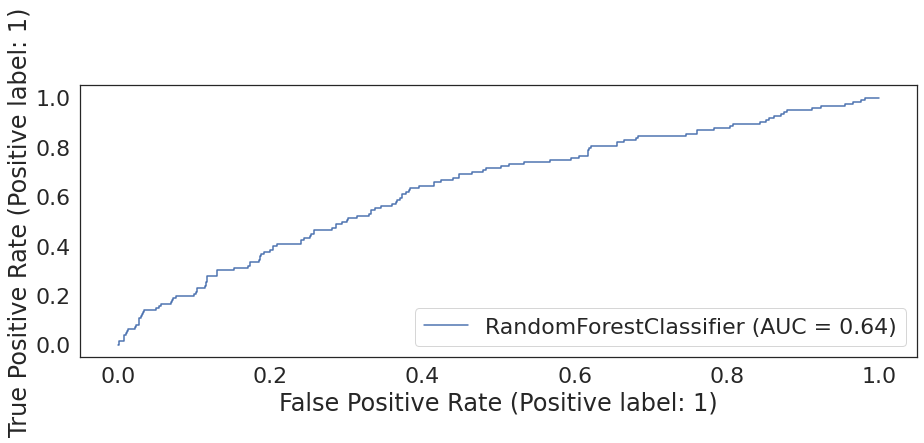

In [85]:
#Plotting roc curve
plot_roc_curve(rf,X_test,y_test)
plt.show()

<h1><b>Decision Trees</b>

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

confussion matrix
[[588  86]
 [ 91  32]]


Accuracy of DecisionTreeClassifier: 77.79171894604768 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       674
           1       0.27      0.26      0.27       123

    accuracy                           0.78       797
   macro avg       0.57      0.57      0.57       797
weighted avg       0.77      0.78      0.78       797





Text(56.49999999999999, 0.5, 'Actual')

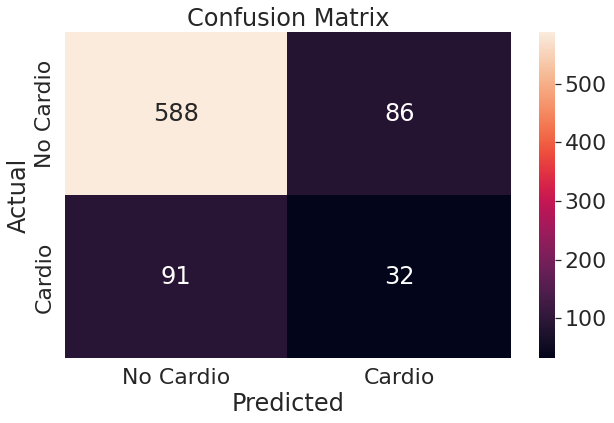

In [86]:
m4 = 'DecisionTreeClassifier'

# Fitting the model with train data
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)

# Predicting the target
dt.fit(X_train,y_train)

#Evaluating the Results
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
print("\n")

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, dt_predicted)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



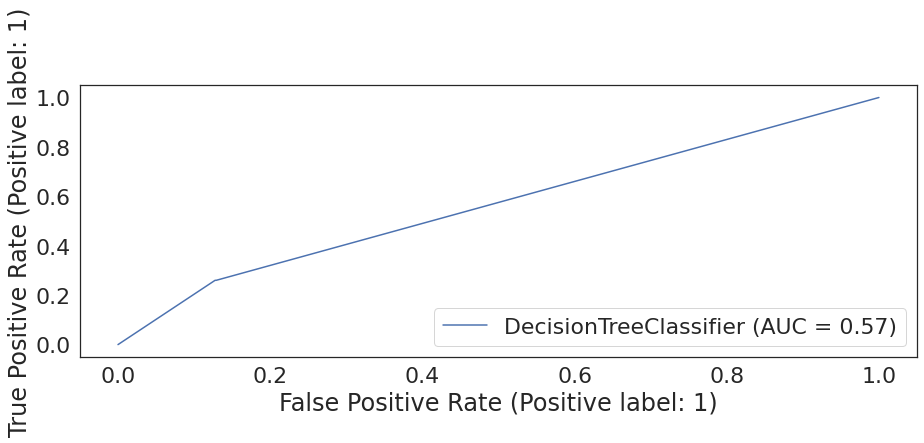

In [87]:
#Plotting roc curve
plot_roc_curve(dt,X_test,y_test)
plt.show()

confussion matrix
[[656  18]
 [114   9]]


Accuracy of Gradient Boosting Classifier: 83.4378920953576 

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       674
           1       0.33      0.07      0.12       123

    accuracy                           0.83       797
   macro avg       0.59      0.52      0.51       797
weighted avg       0.77      0.83      0.79       797



Text(56.49999999999999, 0.5, 'Actual')

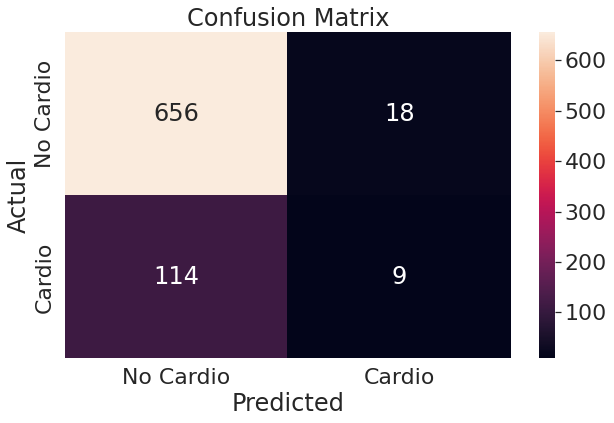

In [88]:
m5 = 'Gradient Boosting Classifier'

# Fitting the model with train data
gvc =  GradientBoostingClassifier()

# Predicting the target
gvc.fit(X_train,y_train)
gvc_predicted = gvc.predict(X_test)

#Evaluating the Results
gvc_conf_matrix = confusion_matrix(y_test, gvc_predicted)
gvc_acc_score = accuracy_score(y_test, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_test,gvc_predicted))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, gvc_predicted)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



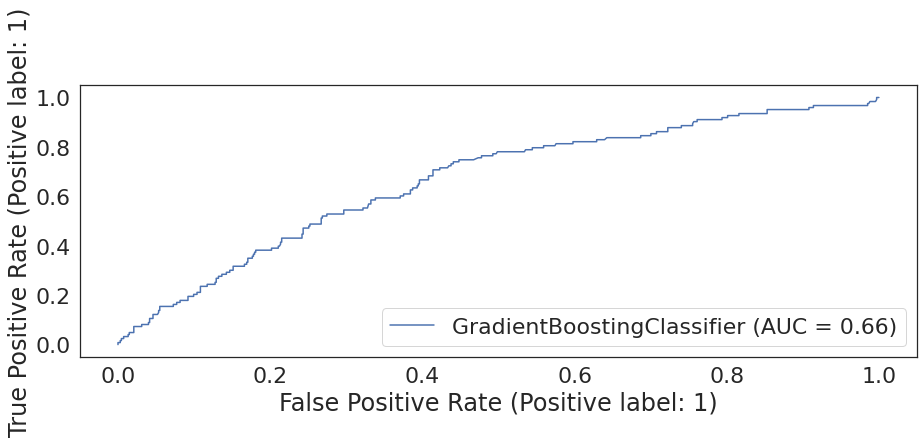

In [89]:
#Plotting roc curve
plot_roc_curve(gvc,X_test,y_test)
plt.show()

Confussion matrix
[[674   0]
 [123   0]]
-----------------------------------------------------------------
-----------------------------------------------------------------
Accuracy of Extreme Gradient Boost: 84.56712672521958
-----------------------------------------------------------------
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       674
           1       0.00      0.00      0.00       123

    accuracy                           0.85       797
   macro avg       0.42      0.50      0.46       797
weighted avg       0.72      0.85      0.77       797



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(56.49999999999999, 0.5, 'Actual')

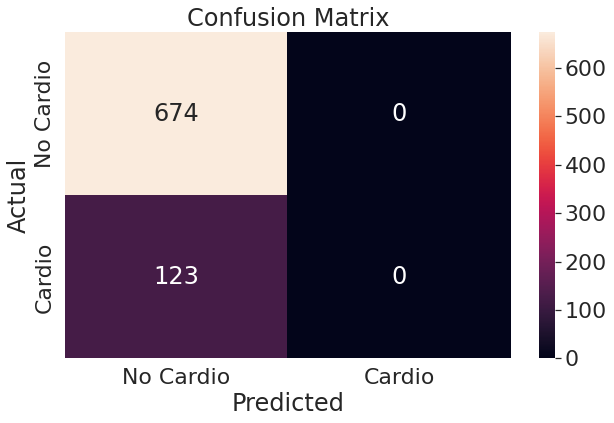

In [90]:
model_egb = 'Extreme Gradient Boost'

# Fitting the model with train data
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

# Predicting the target
xgb.fit(X_train, y_train)

#Evaluating the Results
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("Confussion matrix")
print(xgb_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,xgb_predicted))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, xgb_predicted)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [91]:
# assigning all the above model accuracy's into the variables
lr = accuracy_score(y_test, lr_predict)*100
knn = accuracy_score(y_test, knn_predict)*100
rf = accuracy_score(y_test, rf_predicted)*100
dt = accuracy_score(y_test, dt_predicted)*100
gvc = accuracy_score(y_test, gvc_predicted)*100
xgb = accuracy_score(y_test, xgb_predicted)*100

In [92]:
# Creating accuracy data of lists and then converting it to the dataframe
accuracy = {'Model':['Logistic Regression', 'KNN,n=9', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost'],
           'Accuracy-75:25':[lr, knn, rf, dt, gvc, xgb]}
acc_df = pd.DataFrame(accuracy)
acc_df.sort_values(by = 'Accuracy-75:25', ascending = False) # sorting the accuracy values descending

,Model,Accuracy-75:25
0,Logistic Regression,85.194479
5,XGBoost,84.567127
2,Random Forest,84.065245
4,Gradient Boosting,83.437892
3,Decision Tree,77.791719
1,"KNN,n=9",75.156838


<h1><b>Data Split 80:20

In [93]:
# Splitting the data Training and Testing sets using train_test_split 
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.20, random_state=0)

In [94]:
# Scaling the data by using MinMaxScaler and fitting the train data

scaler = MinMaxScaler()
scaler.fit(X_train_new)

# Transforming the data

X_train_scaled_new = scaler.transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Linear Regression
# Fitting the model with train data
classifier = LogisticRegression().fit(X_train_new, y_train_new)
# Predicting the target
lr_pred_new = classifier.predict(X_test_new)

# KNN, n=9
# Fitting the model with train data
knn_clf = KNeighborsClassifier(n_neighbors=9,n_jobs=-1).fit(X_train_new, y_train_new)
# Predicting the target
knn_pred_new = knn_clf.predict(X_test_new)

# Random Forest
# Fitting the model with train data
rfc = RandomForestClassifier().fit(X_train_new, y_train_new)
# Predicting the target
rfc_pred_new = rfc.predict(X_test_new)

# Decision Tree
# Fitting the model with train data
dtc =DecisionTreeClassifier().fit(X_train_new, y_train_new)
# Predicting the target
dtc_pred_new = dtc.predict(X_test_new)

# Decision Tree
# Fitting the model with train data
gvc =GradientBoostingClassifier().fit(X_train_new, y_train_new)
# Predicting the target
gvc_pred_new = gvc.predict(X_test_new)


# XGBoost Classifier
# Fitting the model with train data
xgb = XGBClassifier().fit(X_train_new, y_train_new)
# Predicting the target
xgb_pred_new = xgb.predict(X_test_new)


# assigning all the above model accuracy's into the variables
lr_acc_new = accuracy_score(y_test_new, lr_pred_new)*100
knn_acc_new = accuracy_score(y_test_new, knn_pred_new)*100
rfc_acc_new = accuracy_score(y_test_new, rfc_pred_new)*100
dtc_acc_new = accuracy_score(y_test_new, dtc_pred_new)*100
gvc_acc_new = accuracy_score(y_test_new, gvc_pred_new)*100
xgb_acc_new = accuracy_score(y_test_new, xgb_pred_new)*100


# Creating accuracy data of lists and then converting it to the dataframe
accuracy_new = {'Model':['Logistic Regression', 'KNN,n=9', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost'],
           'Accuracy-80:20':[lr_acc_new, knn_acc_new, rfc_acc_new, dtc_acc_new, gvc_acc_new, xgb_acc_new]}
acc_df_new = pd.DataFrame(accuracy_new)
acc_df_new.sort_values(by = 'Accuracy-80:20', ascending = False) # sorting the accuracy values descending

,Model,Accuracy-80:20
0,Logistic Regression,84.952978
5,XGBoost,84.169279
2,Random Forest,83.699060
4,Gradient Boosting,83.542320
1,"KNN,n=9",83.385580
3,Decision Tree,73.510972


In [96]:
# Merging accuracy's of both the splits (75:25, 80:20) into a single dataframe
final_df = pd.merge(acc_df, acc_df_new ,on = 'Model')
final_df.sort_values(by = 'Accuracy-80:20', ascending = False)

,Model,Accuracy-75:25,Accuracy-80:20
0,Logistic Regression,85.194479,84.952978
5,XGBoost,84.567127,84.169279
2,Random Forest,84.065245,83.699060
4,Gradient Boosting,83.437892,83.542320
1,"KNN,n=9",75.156838,83.385580
3,Decision Tree,77.791719,73.510972


<h1><b>Conclusion

* The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
* The top features in predicting the ten year risk of developing Cardiovasular Heart Disease are 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'.
* The Logistic Regression with the radial kernel is the best performing model in terms of accuracy and the F1 score and Its high AUC-score shows that it has a high true positive rate.
* With more data(especially that of the minority class) better models can be built.